# NAME :- Kartikeya Gupta
# Task 3 :- Detection of Face Mask

**Imports**

In [103]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

**Import XML data for Face Detection**

In [104]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

## Training ML Model For Mask Detection

**Train Model using Masked Images**

In [105]:
with_mask_data = []
count = 1
for i in list(os.listdir("Dataset/with_mask")):
    img = cv2.imread("Dataset/with_mask/"+str(i))
    face = haar_data.detectMultiScale(img)
    if type(face) == np.ndarray:
        count += 1
        for x, y, w, h in face:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4)
        face = img[y:y+h, x:x+w, :]
        face = cv2.resize(face, (50, 50))
        if count<=150:
            with_mask_data.append(face)
        else:
            break

**Train Model using Non-Masked Images**

In [106]:
without_mask_data = []
count = 1
for i in list(os.listdir("Dataset/without_mask")):
    img = cv2.imread("Dataset/without_mask/"+str(i))
    face = haar_data.detectMultiScale(img)
    if type(face) == np.ndarray:
        count += 1
        for x, y, w, h in face:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4)
        face = img[y:y+h, x:x+w, :]
        face = cv2.resize(face, (50, 50))
        if count<=150:
            without_mask_data.append(face)
        else:
            break


**Store Extracted Data in form of Numpy array**

In [107]:
np.save('with_mask.npy', with_mask_data)
np.save('without_mask.npy', without_mask_data)

**Prepare Model For Prediction** 

In [108]:
with_mask = np.load('with_mask.npy')
with_mask = with_mask.reshape(149, 50*50*3)

without_mask = np.load('without_mask.npy')
without_mask = without_mask.reshape(149, 50*50*3)

x = np.r_[with_mask, without_mask]
labels = np.zeros(x.shape[0])
labels[149:] = 1.0
names = {0:'Mask', 1:'No Mask'}
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size = 0.25)
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

**Check Efficiency of ML Model**

In [109]:
accr = int((accuracy_score(y_test, y_pred)*100))
print(f"Accuracy of Model is {accr}%")

Accuracy of Model is 92%


## Prediction From ML Model

**Load Test Image**

In [110]:
img = cv2.imread("test_images/test_image_0.jpg")

**Display Test Image**

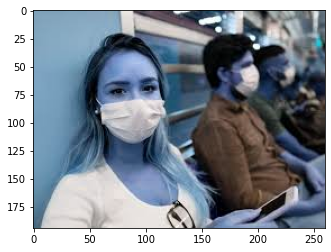

In [111]:
plt.imshow(img)
plt.show()

**Extract Face Data**

In [112]:
face = haar_data.detectMultiScale(img)
for x, y, w, h in face:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4)
        face = img[y:y+h, x:x+w, :]
        face = cv2.resize(face, (50, 50))
        face = face.reshape(1, -1)

**Display Extracted Face**

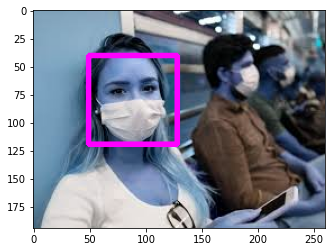

In [113]:
plt.imshow(img)
plt.show()

**Prediction using ML Model**

In [114]:
pred = clf.predict(face)[0]
n = names[int(pred)]


**Display The Result** 

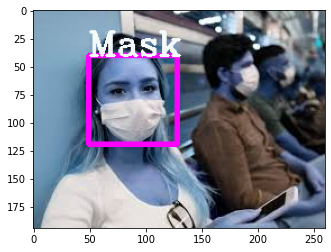

In [115]:
face = haar_data.detectMultiScale(img)
font = cv2.FONT_HERSHEY_COMPLEX
for x, y, w, h in face:
    cv2.putText(img, n, (x, y), font, 1, (244, 250, 250), 2)
plt.imshow(img)
plt.show()